In [1]:
import lasio
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)



In [2]:
matplotlib.font_manager.get_font_names()

['Book Antiqua',
 'Palace Script MT',
 'SimSun-ExtB',
 'Old English Text MT',
 'MS Reference Sans Serif',
 'Berlin Sans FB Demi',
 'Impact',
 'Rockwell',
 'Bradley Hand ITC',
 'Wingdings 3',
 'Rage Italic',
 'HoloLens MDL2 Assets',
 'Century Gothic',
 'Agency FB',
 'Javanese Text',
 'Jokerman',
 'Goudy Old Style',
 'Onyx',
 'Garamond',
 'Segoe Fluent Icons',
 'Broadway',
 'Constantia',
 'Curlz MT',
 'cmsy10',
 'Niagara Solid',
 'Ink Free',
 'Calibri',
 'Tw Cen MT',
 'Eras Light ITC',
 'Lucida Calligraphy',
 'Blackadder ITC',
 'Segoe UI Historic',
 'Stencil',
 'OCR A Extended',
 'DejaVu Serif Display',
 'Mongolian Baiti',
 'Ravie',
 'Segoe Script',
 'STIXSizeOneSym',
 'Segoe UI Emoji',
 'Pristina',
 'Wingdings',
 'Bernard MT Condensed',
 'MS Outlook',
 'Forte',
 'MT Extra',
 'Kunstler Script',
 'Script MT Bold',
 'Papyrus',
 'Microsoft Himalaya',
 'STIXSizeFourSym',
 'Gill Sans Ultra Bold',
 'Modern No. 20',
 'Eras Medium ITC',
 'Wingdings 2',
 'Corbel',
 'Lucida Console',
 'Gill Sans M

In [3]:
font = {'family' : 'Calibri',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

# vs_1 = lasio.read(r'..\vs_prediction_iracema\data\only_vs\9_LL_2_RJS_COMPOSITE_2300_5332_VS.las').df()
# vs_2 = lasio.read(r'..\vs_prediction_iracema\data\only_vs\9_LL_6A_RJS_AIT_IS_CAL_DSI_TLD_036PUP_60B_VS.las').df()

In [4]:
raw_data = lasio.read(r'..\vs_prediction_iracema\data\all_logs\9-LL-6A-RJS\9ll6arjs_12_ait_dsi_tdd_cnl-5851.las').df().reset_index(drop=False)

Only engine='normal' can read wrapped files


In [5]:
raw_data=raw_data[['DEPT','DTCO','RHOZ','NPHI','DTSM']]
raw_data['VP'] = 0.3048*10**6/raw_data['DTCO']
raw_data['VS'] = 0.3048*10**6/raw_data['DTSM']/1000

In [6]:
raw_data.columns

Index(['DEPT', 'DTCO', 'RHOZ', 'NPHI', 'DTSM', 'VP', 'VS'], dtype='object')

In [7]:
# wellB4 = lasio.read(r'..\vs_prediction_iracema\data\all_logs\9-LL-2-RJS\9ll2rjs_12_comb_conv.las').df()

In [8]:
# lit = lasio.read(r'C:\Users\patri\Documents\Doutorado\vs_prediction\Pré_Sal_Santos\Litholog.las').df().reset_index(drop=False)
# por = lasio.read(r'C:\Users\patri\Documents\Doutorado\vs_prediction\Pré_Sal_Santos\Porosity.las').df().reset_index(drop=False)
# res = lasio.read(r'C:\Users\patri\Documents\Doutorado\vs_prediction\Pré_Sal_Santos\Resis.las').df().reset_index(drop=False)
# son = lasio.read(r'C:\Users\patri\Documents\Doutorado\vs_prediction\Pré_Sal_Santos\Sonic.las').df().reset_index(drop=False)

In [9]:
# columns_lit = ['DEPTH','PHIE','PHIT','SWT','SWE','BVWE','VSH','VCL','VSALT','VANHY','PERM_KL','ResFlag','PayFlag']
# columns_por = ['DEPTH','PHIE','PHIT','SWT','SWE','BVWE','VSH','VCL','VSALT','VANHY','PERM_KL','ResFlag','PayFlag']
# columns_res = ['DEPTH','GR','CALI','BS','RDEP','RMED','RSHA','DT','DTS','DTST','DEN','DENC','NEU','TENS','TCMR','CMRP_3MS','CMFF','KTIM','KSDR','URAN','POTA','THOR','ROP']
# columns_son = ['DEPTH','DTE','DTSE','DENE','VS','VP']


In [10]:
# lit.columns = columns_lit
# por.columns = columns_por
# res.columns = columns_res
# son.columns = columns_son

In [11]:
# print(lit.DEPTH)
# print(por.DEPTH)
# print(res.DEPTH)
# print(son.DEPTH)

In [12]:
# vp = son[['DEPTH','VP']]
# rho = res[['DEPTH','DEN']]
# phi = por[['DEPTH','PHIT']]
# vs = son[['DEPTH','VS']]

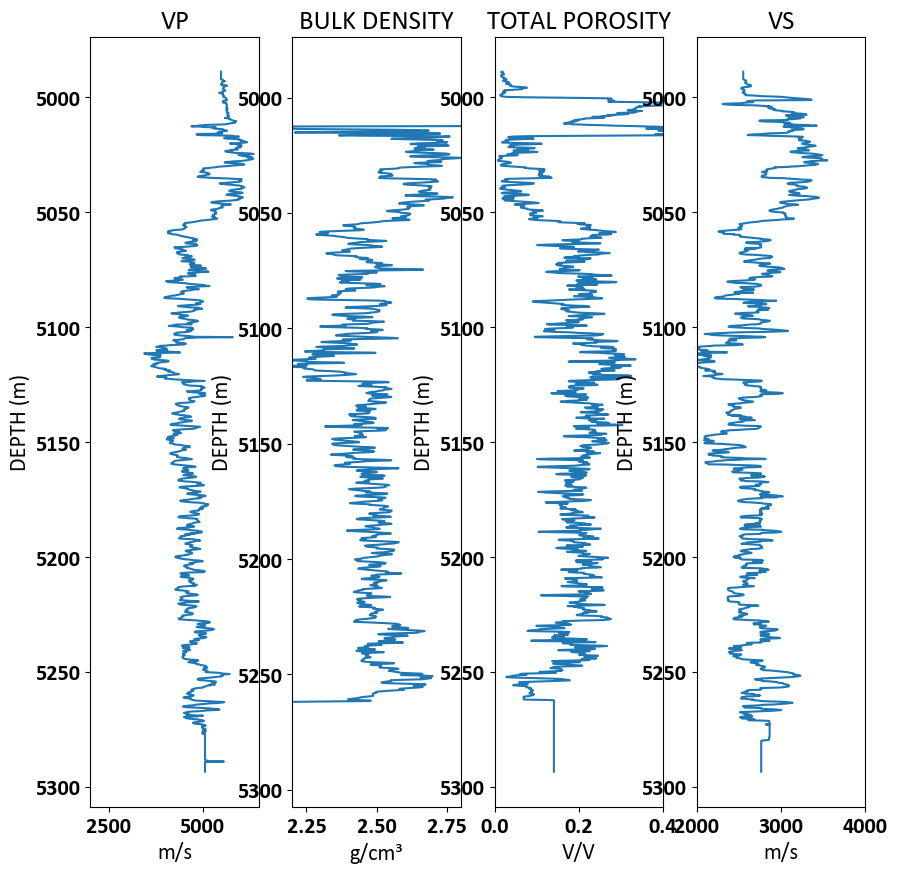

In [13]:
# y_range = [5256.0564,5879.5248	]

fig, ax = plt.subplots(1,4, figsize=(10,10))
ax[0].plot(raw_data.VP, raw_data.DEPT)
ax[0].set_title('VP')
ax[0].set_ylabel('DEPTH (m)')
ax[0].set_xlim([2000,6500])
# ax[0].set_ylim(y_range)
ax[0].set_xlabel('m/s')
ax[0].invert_yaxis()

ax[1].plot(raw_data.RHOZ, raw_data.DEPT)
ax[1].set_title('BULK DENSITY')
ax[1].set_ylabel('DEPTH (m)')
ax[1].set_xlim([2.2,2.8])
# ax[1].set_ylim(y_range)
ax[1].set_xlabel('g/cm³')
ax[1].invert_yaxis()

ax[2].plot(raw_data.NPHI, raw_data.DEPT)
ax[2].set_title('TOTAL POROSITY')
ax[2].set_ylabel('DEPTH (m)')
ax[2].set_xlim([0,0.4])
# ax[2].set_ylim(y_range)
ax[2].set_xlabel('V/V')
ax[2].invert_yaxis()

ax[3].plot(raw_data.VS*1000, raw_data.DEPT)
ax[3].set_title('VS')
ax[3].set_ylabel('DEPTH (m)')
ax[3].set_xlim([2000,4000])
# ax[3].set_ylim(y_range)
ax[3].set_xlabel('m/s')
ax[3].invert_yaxis()

In [14]:
def despike(curve, window_size, tolerance):
  import numpy as np
  smoothed = []
  despiked = []
  for i in range(0, len(curve) - window_size + 1):
    mean = np.average(curve[i:i+window_size])
    smoothed.append(mean)
  for j in range(len(curve)-window_size+2, len(curve)+1):
    mean = sum(curve[-window_size:])/window_size
    smoothed.append(mean)
  for k in range(0, len(curve)):
    if abs(smoothed[k]-curve[k])>=tolerance:
      despiked.append(smoothed[k])
    else:
      despiked.append(curve[k])
  return despiked

In [15]:
vp_des = despike(raw_data['VP'],10,1000)
rho_des = despike(raw_data['RHOZ'],10, 0.1)
phi_des = despike(raw_data['NPHI'],10, 0.05)
vs_des = despike(raw_data['VS']*1000, 10, 1000)

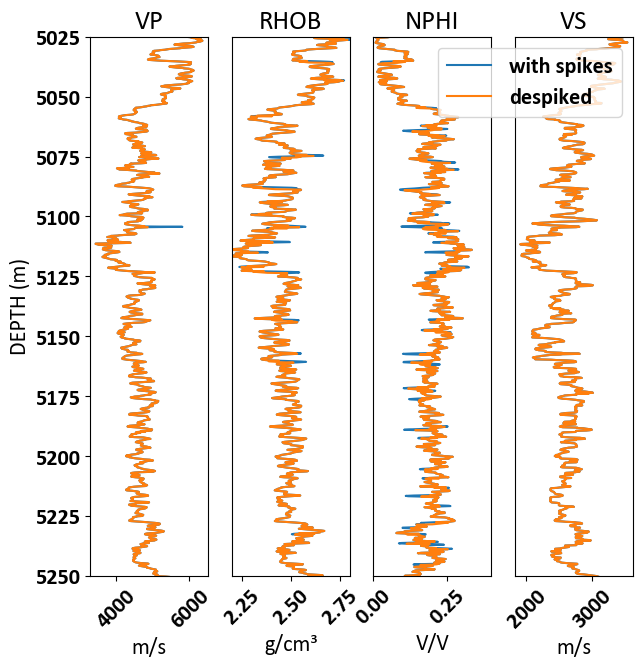

In [16]:
y_range = [5025,5250]
fig, ax = plt.subplots(1,4, figsize=(7,7))
ax[0].plot(raw_data.VP, raw_data.DEPT)
ax[0].plot(np.asarray(vp_des), raw_data.DEPT)
ax[0].set_title('VP')
ax[0].set_ylabel('DEPTH (m)')
# ax[0].set_xlim([3100,7200])
ax[0].set_ylim(y_range)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel('m/s')
ax[0].invert_yaxis()

ax[1].plot(raw_data.RHOZ, raw_data.DEPT)
ax[1].plot(rho_des, raw_data.DEPT)
ax[1].set_title('RHOB')
ax[1].yaxis.set_tick_params(which='both', left=False, right=False, labelleft=False)
ax[1].set_xlim([2.2,2.8])
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylim(y_range)
ax[1].set_xlabel('g/cm³')
ax[1].invert_yaxis()

ax[2].plot(raw_data.NPHI, raw_data.DEPT)
ax[2].plot(phi_des, raw_data.DEPT)
ax[2].set_title('NPHI')
ax[2].yaxis.set_tick_params(which='both', left=False, right=False, labelleft=False)
ax[2].set_xlim([0,0.4])
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_ylim(y_range)
ax[2].set_xlabel('V/V')
ax[2].invert_yaxis()

ax[3].plot(raw_data.VS*1000, raw_data.DEPT)
ax[3].plot(np.asarray(vs_des), raw_data.DEPT)
ax[3].set_title('VS')
ax[3].yaxis.set_tick_params(which='both', left=False, right=False, labelleft=False)
# ax[3].set_xlim([2000,4000])
ax[3].set_ylim(y_range)
ax[3].tick_params(axis='x', rotation=45)
# ax[3].set_yticks([])
ax[3].set_xlabel('m/s')
ax[3].legend(['with spikes', 'despiked'], loc = 'upper right')
ax[3].invert_yaxis()

plt.savefig('wellC.pdf', bbox_inches='tight', dpi=300)

In [17]:
raw_data_slc = raw_data.iloc[281:1754]

In [18]:
# Checking if there are NaN values
print(raw_data_slc.isna().sum())


DEPT    0
DTCO    0
RHOZ    0
NPHI    0
DTSM    0
VP      0
VS      0
dtype: int64


In [19]:
# print(vp.loc[vp['DEPTH']==y_range[0]])
# print(vp.loc[vp['DEPTH']==y_range[1]])

# print(rho.loc[rho['DEPTH']==y_range[0]])
# print(rho.loc[rho['DEPTH']==y_range[1]])

# print(phi.loc[phi['DEPTH']==y_range[0]])
# print(phi.loc[phi['DEPTH']==y_range[1]])

# print(vs.loc[vs['DEPTH']==y_range[0]])
# print(vs.loc[vs['DEPTH']==y_range[1]])

In [20]:
# # Slicing dataframes
# vp_sliced = pd.DataFrame(vp_des).iloc[13557:17648]
# rho_sliced = pd.DataFrame(rho_des).iloc[20052:24143]
# phi_sliced = pd.DataFrame(phi_des).iloc[433:4524]
# vs_sliced = pd.DataFrame(vs_des).iloc[13557:17648]

In [21]:
# Scaling data


# vp_scln = np.squeeze(scaler.fit_transform(vp_sliced))
# rho_scln = np.squeeze(scaler.fit_transform(rho_sliced))
# phi_scln = np.squeeze(scaler.fit_transform(phi_sliced))

In [22]:
data = pd.DataFrame({'VP':raw_data_slc['VP'], 'RHO':raw_data_slc['RHOZ'], 'PHI':raw_data_slc['NPHI'], 'VS':raw_data_slc['VS']})

In [23]:

import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Spliting data into train and test
from sklearn.model_selection import train_test_split
X = scaler.fit_transform(data[['VP', 'RHO', 'PHI']])
y = data.VS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib
from joblib import dump, load
dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

# Creating models

## SVR

In [24]:
# Creating SVR model
from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# {'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
svr_reg = SVR(C=10, epsilon=.1, kernel="rbf", gamma=.1)
svr_reg.fit(X_train, y_train)

SVR(C=10, gamma=0.1)

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid_svr = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf'],
                 'epsilon':[0.1,0.15,0.2,0.25,0.3]}

# modelsvr = SVR(),

# grid_svr = GridSearchCV(SVR(), param_grid_svr, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid_svr.fit(X_train, y_train)

In [26]:
# grid_svr.best_params_

In [27]:
joblib.dump(svr_reg, "svr_model.joblib")

['svr_model.joblib']

## Random Forest

In [28]:
# Creating Random Forest model 
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=7, random_state=42,n_estimators=200)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=200, random_state=42)

In [29]:
# grid_rf.best_params_

In [30]:
parameters_rf = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
}
# regr_rf = RandomForestRegressor(random_state=42)

# grid_rf = GridSearchCV(regr_rf, parameters_rf, verbose=3)
# grid_rf.fit(X_train, y_train)

In [31]:
# !pip install joblib==1.4.0

In [32]:
joblib.dump(rf_reg, "rf_model.joblib")

# load
# loaded_rf = joblib.load("rf_model.joblib")



['rf_model.joblib']

In [33]:
import joblib
import sklearn
print("Versão do joblib:", joblib.__version__)
print("Versão do scikit-learn:", sklearn.__version__)

Versão do joblib: 1.4.0
Versão do scikit-learn: 1.4.2


## MLP

In [34]:
# Creating MLP model
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

keras.utils.set_random_seed(42)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, restore_best_weights=True,patience=15,mode='min')

mlp_reg = Sequential()
mlp_reg.add(Dense(512, activation='relu'))
mlp_reg.add(Dense(32, activation='relu'))
mlp_reg.add(Dense(1, activation = 'linear'))

mlp_reg.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics='mse', loss='mse')

# mlp_reg_history=mlp_reg.fit(X_train, y_train, batch_size=64, epochs=2000, validation_data=(X_test, y_test), callbacks=[early_stopping])

In [35]:
# !pip install keras-tuner

In [36]:
import tensorflow as tf
# from keras.layers import 
import keras_tuner as kt
def model_builder(hp):
    model = keras.Sequential()
    # model.add(keras.layers.Input(input_shape=X_train.shape))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
    # hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    for i in range(hp.Int('num_dense_layers', 2, 5)):
        model.add(Dense(units=hp.Int('dense_' + str(i), min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(hp.Choice('dropout_'+ str(i), values=[0.0, 0.1, 0.2, 0.3, 0.4])))
    model.add(keras.layers.Dense(1, activation='relu'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
                loss='mse',
                metrics=['mse'])

    return model

In [37]:

tuner_mlp = kt.tuners.Hyperband(
    model_builder,
    seed=42,
    objective='val_loss',
    # max_trials=100,
    directory='.',
    project_name='tuning-mlp_6_dropout',
    overwrite=False)
                    
stop_early_bayes = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,mode='min',restore_best_weights=True)

# tuner_mlp.search(X_train, y_train, epochs=100, batch_size=128, validation_split=.3, callbacks=[stop_early_bayes])

Reloading Tuner from .\tuning-mlp_6_dropout\tuner0.json


In [38]:
best_hyperparameters_mlp = tuner_mlp.get_best_hyperparameters(1)[0]
best_hyperparameters_mlp.values



{'num_dense_layers': 5,
 'dense_0': 160,
 'dropout_0': 0.0,
 'dense_1': 288,
 'dropout_1': 0.0,
 'learning_rate': 0.001,
 'dense_2': 192,
 'dropout_2': 0.3,
 'dense_3': 384,
 'dropout_3': 0.0,
 'dense_4': 288,
 'dropout_4': 0.4,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0244'}

In [39]:
keras.utils.set_random_seed(42)
model_mlp_tuner = tuner_mlp.hypermodel.build(best_hyperparameters_mlp)
history_mpl_tuner= model_mlp_tuner.fit(X_train,y_train, epochs=500, batch_size=128, validation_split=.3, verbose=2, callbacks=[stop_early_bayes])

Epoch 1/500
6/6 - 4s - loss: 3.7998 - mse: 3.7998 - val_loss: 1.0497 - val_mse: 1.0497 - 4s/epoch - 689ms/step
Epoch 2/500
6/6 - 0s - loss: 0.9989 - mse: 0.9989 - val_loss: 0.7853 - val_mse: 0.7853 - 143ms/epoch - 24ms/step
Epoch 3/500
6/6 - 0s - loss: 0.6435 - mse: 0.6435 - val_loss: 0.7507 - val_mse: 0.7507 - 139ms/epoch - 23ms/step
Epoch 4/500
6/6 - 0s - loss: 0.4642 - mse: 0.4642 - val_loss: 0.4346 - val_mse: 0.4346 - 148ms/epoch - 25ms/step
Epoch 5/500
6/6 - 0s - loss: 0.4440 - mse: 0.4440 - val_loss: 0.7123 - val_mse: 0.7123 - 155ms/epoch - 26ms/step
Epoch 6/500
6/6 - 0s - loss: 0.4018 - mse: 0.4018 - val_loss: 0.9271 - val_mse: 0.9271 - 135ms/epoch - 23ms/step
Epoch 7/500
6/6 - 0s - loss: 0.2999 - mse: 0.2999 - val_loss: 0.5221 - val_mse: 0.5221 - 151ms/epoch - 25ms/step
Epoch 8/500
6/6 - 0s - loss: 0.3709 - mse: 0.3709 - val_loss: 0.5265 - val_mse: 0.5265 - 166ms/epoch - 28ms/step
Epoch 9/500
6/6 - 0s - loss: 0.3266 - mse: 0.3266 - val_loss: 0.3070 - val_mse: 0.3070 - 163ms/epo

In [40]:
# model_mlp_tuner.save('mlp_model1.h5')
model_mlp_tuner = keras.models.load_model('mlp_model1.h5')

In [41]:
tf.__version__

'2.10.1'

In [42]:

from keras.utils import plot_model
plot_model(model_mlp_tuner, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## CNN-1D

In [43]:
sample_size_train = X_train.shape[0]
timesteps_train = X_train.shape[1]
sample_size_test = X_test.shape[0]
timesteps_test = X_test.shape[1]
input_dimension = 1

X_train_cnn1d = X_train.reshape(sample_size_train, timesteps_train,1)
X_test_cnn1d = X_test.reshape(sample_size_test, timesteps_test,1)

In [44]:
# Criando modelo
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Conv1D, MaxPool2D, Activation, SpatialDropout2D, LSTM, Dropout
tf.random.set_seed(42)
import keras_tuner as kt
def model_builder(hp):
    model = keras.Sequential()
    n_timesteps = X_train_cnn1d.shape[1] #13
    n_features  = X_train_cnn1d.shape[2] 
    model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
    

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
#     hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    for i in range(hp.Int('num_conv_layers',2,2)):
        if i>1:
            KERNEL_SIZE=2
        else:
            KERNEL_SIZE=3
        model.add(Conv1D(filters=hp.Int('conv_' + str(i), min_value=32, max_value=512, step=16), kernel_size=KERNEL_SIZE, activation=hp.Choice('activation',values=['relu','softsign']), padding='same'))
        # model.add(Dropout(hp.Choice('dropout_'+ str(i), values=[0.0, 0.1, 0.2, 0.3, 0.4])))
 
    model.add(Flatten())
#     model.add(RBFLayer(hp.Int(name='units',min_value=32, max_value=512, step=16),hp.Choice(name='gamma',values=[0.1,0.5,1.,2.5,5.,7.5,10.])))   
    for i in range(hp.Int('num_dense_layers', 2, 2)):
        model.add(Dense(units=hp.Int('dense_' + str(i), min_value=32, max_value=512, step=16), activation=hp.Choice('activation',values=['relu','softsign'])))
        # model.add(Dropout(hp.Choice('dropout_'+ str(i), values=[0.0, 0.1, 0.2, 0.3, 0.4])))
    model.add(keras.layers.Dense(1, activation='relu'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-4,1e-3,1e-2])

    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
                loss='mse',
                metrics=['mse'])

    return model

In [45]:
# tuner_cnn1d = kt.tuners.Hyperband(
#     model_builder,
#     seed=42,
#     objective='val_loss',
#     # max_trials=100,
#     directory='.',
#     project_name='tuning-cnn1d',
#     overwrite=True)
                    
# stop_early_bayes = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,mode='min',restore_best_weights=True)

# tuner_cnn1d.search(X_train_cnn1d, y_train, epochs=200, batch_size=128,validation_data = (X_test_cnn1d,y_test), callbacks=[stop_early_bayes],verbose=2)

In [46]:
# len(X_train)

## Multiple linear regression

In [47]:
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero
# poly = PolynomialFeatures(degree=3, include_bias=False)

#reshape data to work properly with sklearn
# poly_features = poly.fit_transform(X_train, (-1,1))

#fit polynomial regression model
multi_reg_model = LinearRegression()
multi_reg_model.fit(X_train, y_train)

#display model coefficients
# print(poly_reg_model.intercept_, poly_reg_model.coef_)

LinearRegression()

In [48]:
joblib.dump(multi_reg_model, "multi_model.joblib")

['multi_model.joblib']

# MSE

In [49]:
# rf_pred_grid = grid_rf.predict(X_test)
# svr_pred_grid = grid_svr.predict(X_test)
mlp_pred_grid = model_mlp_tuner.predict(X_test)
# Calculating mse on test data
from sklearn.metrics import mean_squared_error
svr_pred = svr_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)
poly_pred = multi_reg_model.predict(X_test)
# mlp_pred = np.squeeze(mlp_reg.predict(X_test))

mse_data = pd.DataFrame({'MSE':[mean_squared_error(svr_pred, y_test),mean_squared_error(rf_pred, y_test),mean_squared_error(mlp_pred_grid, y_test),mean_squared_error(poly_pred, y_test)]},
                        index=['SVR','Random Forest','MLP', 'Multiple Linear Regression'])
mse_data

14/14 [==============================] - 0s 12ms/step


,MSE
SVR,0.010440
Random Forest,0.010143
MLP,0.011284
Multiple Linear Regression,0.012057


# R2

In [50]:
from sklearn.metrics import r2_score 
r2_data = pd.DataFrame({'R2':[r2_score(svr_pred, y_test),r2_score(rf_pred, y_test),r2_score(mlp_pred_grid, y_test),r2_score(poly_pred, y_test)]},
                        index=['SVR','Random Forest','MLP', 'Multiple Linear Regression'])
r2_data

,R2
SVR,0.865038
Random Forest,0.868177
MLP,0.828721
Multiple Linear Regression,0.831225


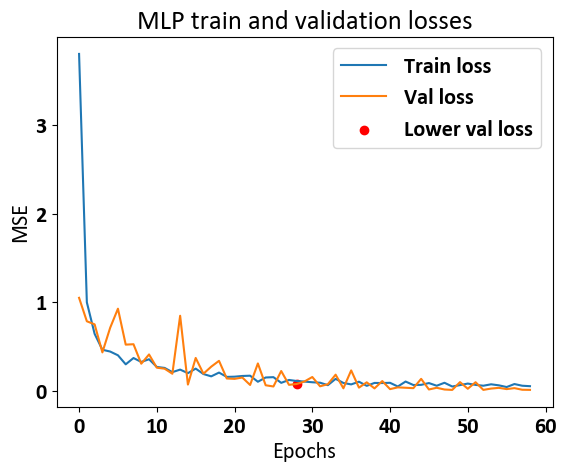

In [51]:
plt.title('MLP train and validation losses')
plt.plot(history_mpl_tuner.history['loss'])
plt.plot(history_mpl_tuner.history['val_loss'])
plt.scatter(28,history_mpl_tuner.history['val_loss'][28], c='r')
plt.ylabel('MSE')
plt.xlabel("Epochs")
plt.legend(["Train loss","Val loss","Lower val loss"])
plt.savefig("Figures\MLP train",bbox_inches="tight")

In [52]:
history_mpl_tuner.history['val_loss'][28]

0.07829415053129196

In [53]:
model_mlp_tuner.save(r'D:\Doutorado\vs_prediction_iracema\tuning_mlp_4')

INFO:tensorflow:Assets written to: D:\Doutorado\vs_prediction_iracema\tuning_mlp_4\assets


In [54]:
# plt.figure(figsize=(5,10))
# plt.scatter(y_test,np.arange(0,len(y_test)), alpha=0.5, label='Real', c='k')
# plt.scatter(svr_pred,np.arange(0,len(y_test)), alpha=0.5, label='SVR', c='blue')
# plt.scatter(rf_pred,np.arange(0,len(y_test)), alpha=0.5, label='Random Forest', c='red')
# plt.scatter(mlp_pred,np.arange(0,len(y_test)), alpha=0.5, label='MLP', c='yellow')
# plt.legend()

In [55]:
all_mlp_pred = model_mlp_tuner.predict(X)
all_rf_pred = rf_reg.predict(X)
all_svr_pred = svr_reg.predict(X)
all_linear_pred = multi_reg_model.predict(X)

47/47 [==============================] - 0s 8ms/step


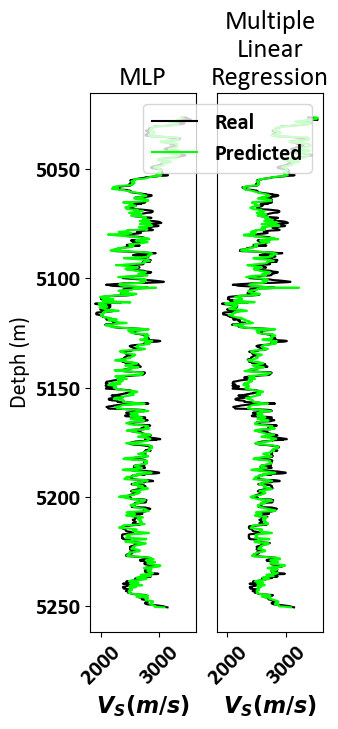

In [56]:
fig, ax = plt.subplots(1,2, figsize=(3,7))

# ax[0].plot(raw_data_slc['VS']*1000, raw_data_slc['DEPT'], label='Real', c='k')
# ax[0].plot(all_rf_pred*1000, raw_data_slc['DEPT'], label='Predicted', c='lime')
# ax[0].set_ylabel('Detph (m)')
# ax[0].set_xlabel('$V_S (m/s)$')
# ax[0].set_title('Random\nForest')
# ax[0].legend()
# ax[0].invert_yaxis()

# ax[1].plot(raw_data_slc['VS']*1000, raw_data_slc['DEPT'], label='Real', c='k')
# ax[1].plot(all_svr_pred*1000, raw_data_slc['DEPT'], label='Predicted', c='lime')
# ax[1].set_xlabel('$V_S (m/s)$')
# ax[1].set_title('SVR')
# ax[1].yaxis.set_tick_params(which='both', left=False, right=False, labelleft=False)
# ax[1].invert_yaxis()

# ax[2].plot(raw_data_slc['VS']*1000, raw_data_slc['DEPT'], label='Real', c='k')
# ax[2].plot(all_svr_pred*1000, raw_data_slc['DEPT'], label='Predicted', c='lime')
# ax[2].set_xlabel('$V_S (m/s)$')
# ax[2].set_title('MLP')
# ax[2].yaxis.set_tick_params(which='both', left=False, right=False, labelleft=False)
# ax[2].invert_yaxis()

# ax[3].plot(raw_data_slc['VS']*1000, raw_data_slc['DEPT'], label='Real', c='k')
# ax[3].plot(all_linear_pred*1000, raw_data_slc['DEPT'], label='Predicted', c='lime')
# ax[3].set_xlabel('$V_S (m/s)$')
# ax[3].set_title('Multiple\nLinear\nRegression')
# ax[3].yaxis.set_tick_params(which='both', left=False, right=False, labelleft=False)
# ax[3].invert_yaxis()

ax[0].plot(raw_data_slc['VS']*1000, raw_data_slc['DEPT'], label='Real', c='k')
ax[0].plot(all_svr_pred*1000, raw_data_slc['DEPT'], label='Predicted', c='lime')
ax[0].set_xlabel('$V_S (m/s)$')
ax[0].set_title('MLP')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylabel('Detph (m)')
# ax[0].yaxis.set_tick_params(which='both', left=False, right=False, labelleft=False)
ax[0].invert_yaxis()

ax[1].plot(raw_data_slc['VS']*1000, raw_data_slc['DEPT'], label='Real', c='k')
ax[1].plot(all_linear_pred*1000, raw_data_slc['DEPT'], label='Predicted', c='lime')
ax[1].set_xlabel('$V_S (m/s)$')
ax[1].set_title('Multiple\nLinear\nRegression')
ax[1].tick_params(axis='x', rotation=45)
ax[1].yaxis.set_tick_params(which='both', left=False, right=False, labelleft=False)
ax[1].legend()
ax[1].invert_yaxis()

plt.savefig('models_predictions.pdf', dpi=300, bbox_inches='tight')

# Saving MLP model

In [57]:
# mlp_reg.save('/content/drive/MyDrive/Física_de_rochas_2022/códigos')